In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [8]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

c:\Users\rebor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


scikit-learnのdatasetsを使ってデータ取得\
pixel_valuesは70000*784の二次元配列

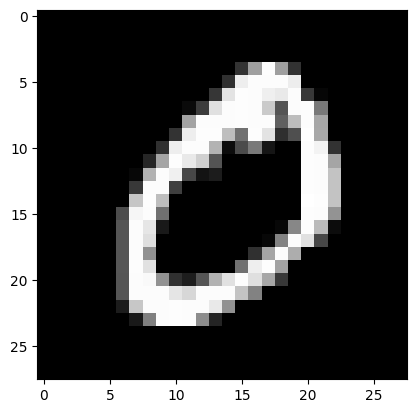

In [11]:
#本にはない記述
#plt.imshowを使う際はndarrayに変換する必要がある
pixel_values = np.array(pixel_values)

single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap="gray")

In [12]:
# transformed_data は3000*2の配列
# 2次元に圧縮
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = ["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

C:\Users\rebor\AppData\Local\Temp\ipykernel_18740\1089764095.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


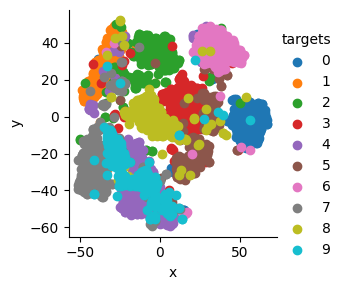

In [14]:
# 書籍ではsizeを指定しているが、そのような引数は存在しない
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()